<a href="https://colab.research.google.com/github/Vipin-1985/Machine-Learning-/blob/main/datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\ddu\\dataset\\bank-tele-datacleaning.csv",skiprows=2)

In [ ]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Drop un necessary columns

In [ ]:
df.drop('customerid',axis=1,inplace=True)

In [ ]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Splitting Column

In [ ]:
df['Job']=df.jobedu.apply(lambda x:x.split(",")[0])

In [ ]:
df['Education']=df.jobedu.apply(lambda x:x.split(",")[1])

In [ ]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'Job', 'Education'],
      dtype='object')

In [ ]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


# drop jobedu column

In [ ]:
df.drop('jobedu', axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'Job', 'Education'],
      dtype='object')

# Handling Missing Values

In [ ]:
df.age.isnull().sum()

20

In [ ]:
df1=df[~df.age.isnull()].copy()# includes all data in dataframe

In [ ]:
df1.age.isnull().sum()

0

In [ ]:
df1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
df1.month.isnull().sum()

50

In [ ]:
df1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [ ]:
monthmode=df1.month.mode()[0]



In [ ]:
df1.month.fillna(monthmode,inplace=True)
df1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [ ]:
df1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
Job           0
Education     0
dtype: int64

In [ ]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
df1.loc[df.pdays<0,"pdays"]=np.NaN

In [ ]:
df1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [ ]:
df1.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36939
previous         0
poutcome         0
response        30
Job              0
Education        0
dtype: int64

In [ ]:
df1.pdays.value_counts()

182.0    167
92.0     146
183.0    126
91.0     126
181.0    116
        ... 
404.0      1
32.0       1
551.0      1
670.0      1
530.0      1
Name: pdays, Length: 557, dtype: int64

In [ ]:
df1.shape

(45191, 19)

# univariate analysis


<AxesSubplot:>

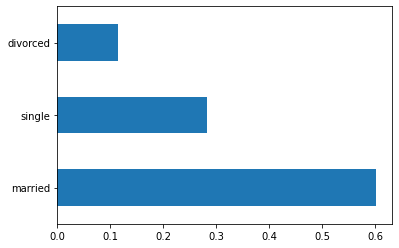

In [ ]:
#used for categorical
df1.marital.value_counts(normalize=True).plot.barh()

<AxesSubplot:ylabel='month'>

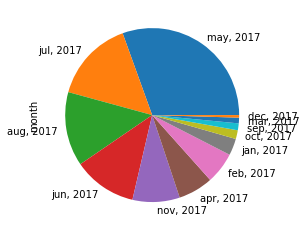

In [ ]:
#categorical odered age group,month,education
df1.month.value_counts(normalize=True).plot.pie()

<AxesSubplot:>

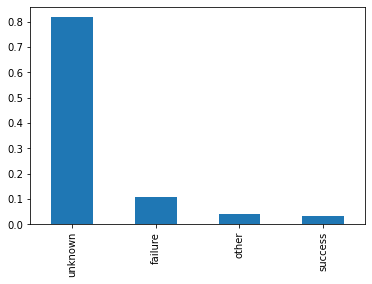

In [ ]:
df1.poutcome.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

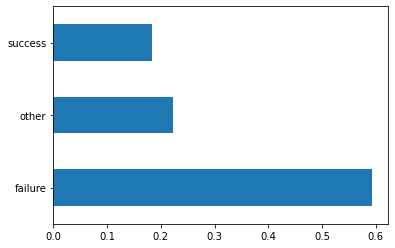

In [ ]:
df1[~(df1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.barh()

<AxesSubplot:ylabel='response'>

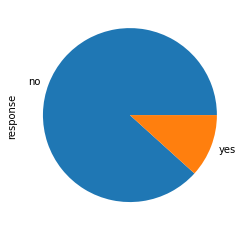

In [ ]:
df1.response.value_counts().plot.pie()

# Bivariate analysis

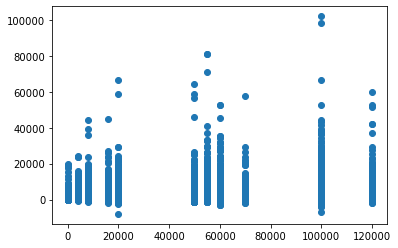

In [ ]:
#numerical to numerical
plt.scatter(df1.salary,df1.balance)
plt.show()

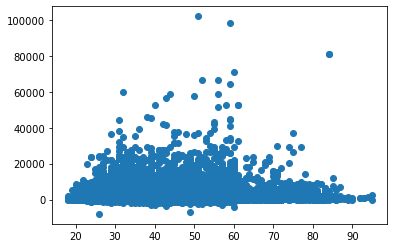

In [ ]:
plt.scatter(df1.age,df1.balance)
plt.show()

In [ ]:
import seaborn as sns

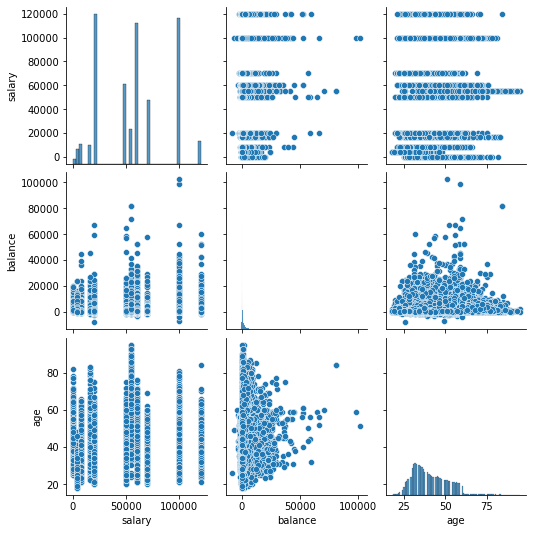

In [ ]:
sns.pairplot(data=df1,vars=['salary','balance','age'])
plt.show()

# correlation heatmap

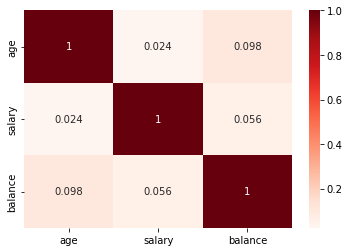

In [ ]:
sns.heatmap(df1[["age","salary","balance"]].corr(),annot=True,cmap="Reds")
plt.show()

# categorical numerical

In [ ]:
df1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

<AxesSubplot:xlabel='response', ylabel='salary'>

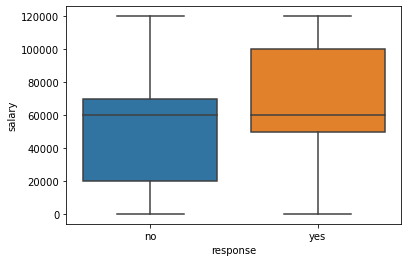

In [ ]:
sns.boxplot(data=df1,x="response",y="salary")

<AxesSubplot:xlabel='response', ylabel='balance'>

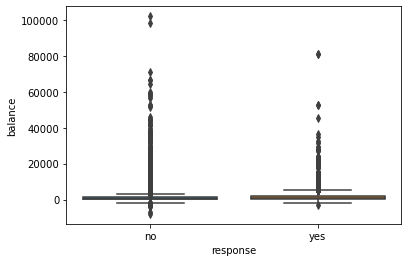

In [ ]:
sns.boxplot(data=df1,x="response",y="balance")

In [ ]:
df1.groupby("response")['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

<AxesSubplot:xlabel='response'>

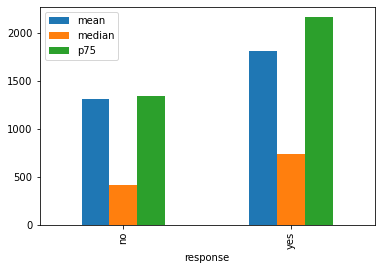

In [ ]:
def p75(x):
    return np.quantile(x,0.75)
df1.groupby("response")['balance'].aggregate(["mean","median",p75]).plot.bar()

# Cat-Cat

In [ ]:
df1['response_flag']=np.where(df1.response=="yes",1,0)
df1.response_flag.value_counts(normalize=True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [ ]:
df1.response_flag.mean()

0.11694806488017526

In [ ]:
df1.groupby("Education")['response_flag'].mean()

Education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

In [ ]:
#as education increases response rate also increasing


<AxesSubplot:ylabel='marital'>

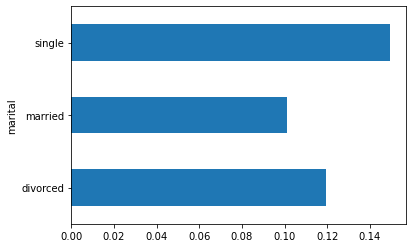

In [ ]:
df1.groupby("marital")['response_flag'].mean().plot.barh()

In [ ]:
# single has more response rate

# using Bucket

In [ ]:
df1['agegroup']=pd.cut(df1.age,[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [ ]:
df1.agegroup.value_counts()

30-40    17679
40-50    11235
50-60     8061
<30       7028
60+       1188
Name: agegroup, dtype: int64

<AxesSubplot:xlabel='agegroup'>

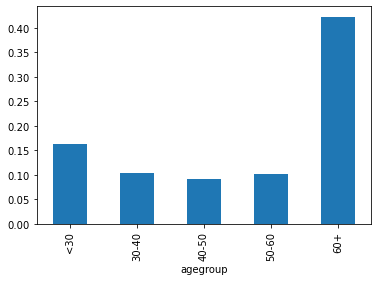

In [ ]:
df1.groupby("agegroup")['response_flag'].mean().plot.bar()

# multivariate analysis

In [ ]:
res=pd.pivot_table(data=df1,index="Education",columns="marital",values="response_flag")

In [ ]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center)